In [ ]:
import os

project_dir = os.path.dirname(os.path.abspath(""))
metrics_dir = project_dir + '/metrics_calculation/output/'

# 获取metrics_dir下的所有文件名
file_list = os.listdir(metrics_dir)
file_list = [_ for _ in file_list if _.endswith(".json")]


In [2]:
import json

def read_json(file_path):
    """读取数据集Part对应的json文件, 返回list of dict"""
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data

def extract_metrics(data, path=None, result=None):
    if path is None:
        path = []
    if result is None:
        result = {}

    for key, value in data.items():
        new_path = path + [key]
        if isinstance(value, dict):
            extract_metrics(value, new_path, result)
        else:
            path_str = '-'.join(new_path)
            # print(path_str)
            if path_str not in result:
                result[path_str] = []
            result[path_str].append(value)
    return result



In [3]:
import numpy as np
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor
from construct_feature_vector import transform_metrics_to_vector
import os

import numpy as np
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor
from construct_feature_vector import transform_metrics_to_vector
import os


# 假设read_json, extract_metrics, transform_metrics_to_vector等函数已经定义
def process_file(file_name, metrics_dir):
    raw_vector_list = []
    data = read_json(metrics_dir + file_name)

    for _ in data:
        metrics = extract_metrics(_[list(_.keys())[0]])
        raw_vector_list.append(metrics)

    return raw_vector_list

def single_process(file_list, metrics_dir):
    raw_vector_list = []
    for file_name in tqdm(file_list):
        raw_vector_list += process_file(file_name, metrics_dir)
    return raw_vector_list

# 定义文件列表、路径等
raw_vector_list = []
file_list_choiced = np.random.choice(file_list, 1000)
file_list_choiced = file_list
for file_name in tqdm(file_list_choiced):
    raw_vector_list += process_file(file_name, metrics_dir)
raw_vector_list


100%|██████████| 8534/8534 [12:47<00:00, 11.11it/s]  


[{'stationarity-stationarity': [0],
  'trend-trend': [1],
  'trend-tau': [0.1837],
  'seasonality-count': [3],
  'seasonality-seasonalstrength': [0.8899],
  'volatility-cv': [0.3595],
  'volatility-cv_raw': [0.3595],
  'memory-hurst': [0.9235],
  'scedasticity-LM': [0],
  'outliers-count': [0.1035]},
 {'stationarity-stationarity': [1],
  'trend-trend': [0],
  'trend-tau': [0.0264],
  'seasonality-count': [3],
  'seasonality-seasonalstrength': [0.7968],
  'volatility-cv': [0.3134],
  'volatility-cv_raw': [0.3134],
  'memory-hurst': [0.7679],
  'scedasticity-LM': [0],
  'outliers-count': [0.0951]},
 {'stationarity-stationarity': [0],
  'trend-trend': [1],
  'trend-tau': [0.1069],
  'seasonality-count': [3],
  'seasonality-seasonalstrength': [0.6026],
  'volatility-cv': [0.4657],
  'volatility-cv_raw': [0.4657],
  'memory-hurst': [0.836],
  'scedasticity-LM': [0],
  'outliers-count': [0.078]},
 {'stationarity-stationarity': [0],
  'trend-trend': [1],
  'trend-tau': [0.3958],
  'seasonalit

In [4]:
keys = raw_vector_list[0].keys()
result_dict = {key: [] for key in keys}
for raw_vector in raw_vector_list:
    for key in keys:
        result_dict[key] += raw_vector[key]
bins = {}
for key in keys:
    bins[key] = np.histogram(result_dict[key], bins=10)[1]

keys


dict_keys(['stationarity-stationarity', 'trend-trend', 'trend-tau', 'seasonality-count', 'seasonality-seasonalstrength', 'volatility-cv', 'volatility-cv_raw', 'memory-hurst', 'scedasticity-LM', 'outliers-count'])

In [5]:
import numpy as np

result_dict.keys()
# downsampling
result_dict_downsampled = {}
for key in result_dict:
    num_samples = result_dict[key]
    downsampling_rate = 0.01
    num_samples_downsampled = int(downsampling_rate * len(num_samples))
    result_dict_downsampled[key] = np.random.choice(result_dict[key], num_samples_downsampled)

del result_dict

# rename
result_dict_downsampled['Stationarity'] = result_dict_downsampled.pop('stationarity-stationarity')
result_dict_downsampled['Trend'] = result_dict_downsampled.pop('trend-trend')
result_dict_downsampled['Strength_t'] = result_dict_downsampled.pop('trend-tau')
result_dict_downsampled['Seasonality_count'] = result_dict_downsampled.pop('seasonality-count')
result_dict_downsampled['Seasonality_s'] = result_dict_downsampled.pop('seasonality-seasonalstrength')
result_dict_downsampled['Volatility'] = result_dict_downsampled.pop('volatility-cv')
result_dict_downsampled['Memorability'] = result_dict_downsampled.pop('memory-hurst')
result_dict_downsampled['Scedasticity'] = result_dict_downsampled.pop('scedasticity-LM')
result_dict_downsampled['Anomaly'] = result_dict_downsampled.pop('outliers-count')


(31,)
(31,)


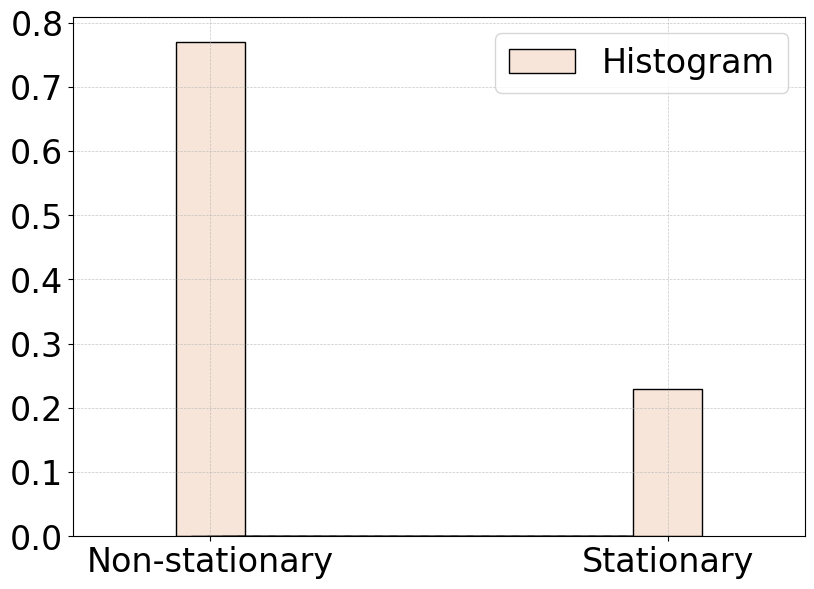

(11,)
(11,)


<Figure size 640x480 with 0 Axes>

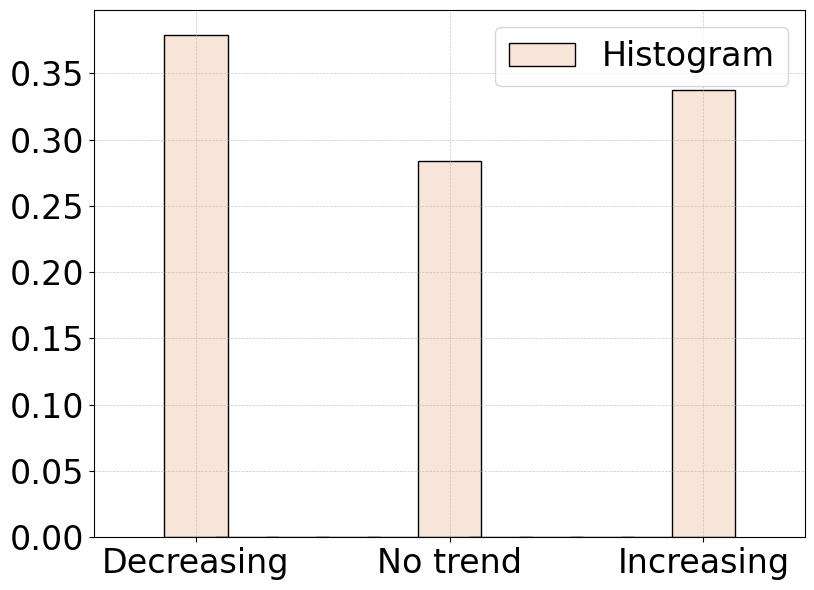

<Figure size 640x480 with 0 Axes>

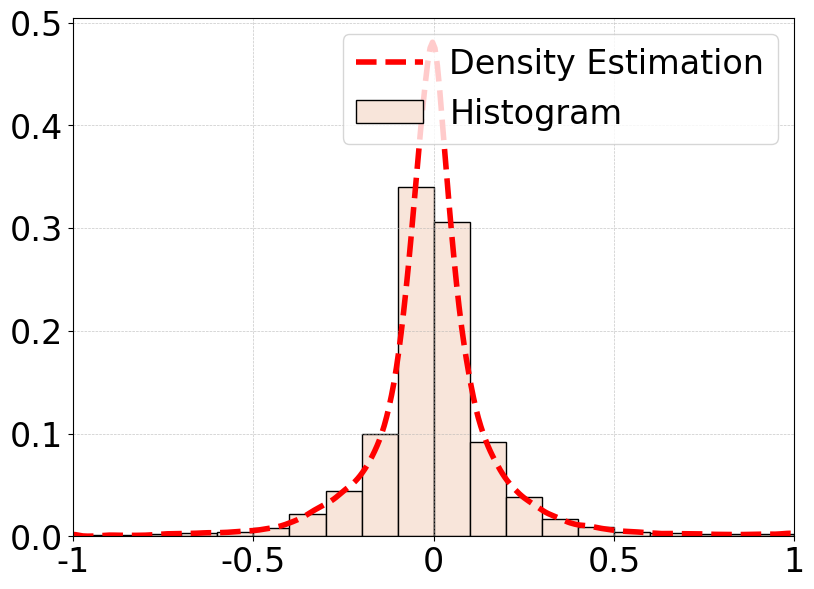

(31,)
(31,)


<Figure size 640x480 with 0 Axes>

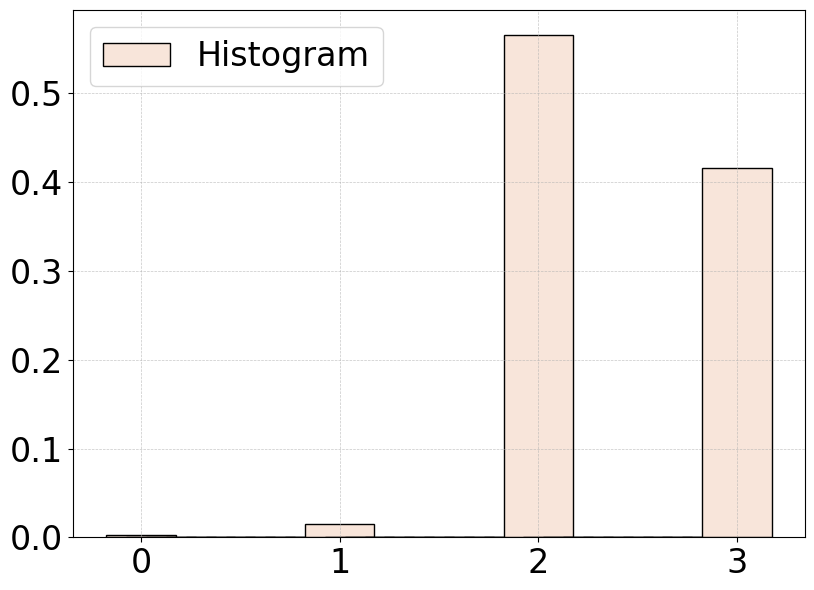

<Figure size 640x480 with 0 Axes>

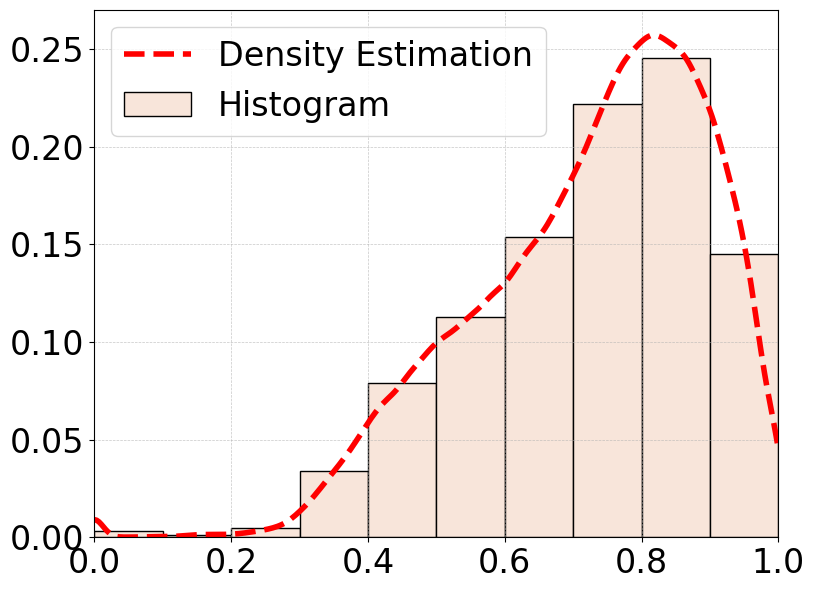

<Figure size 640x480 with 0 Axes>

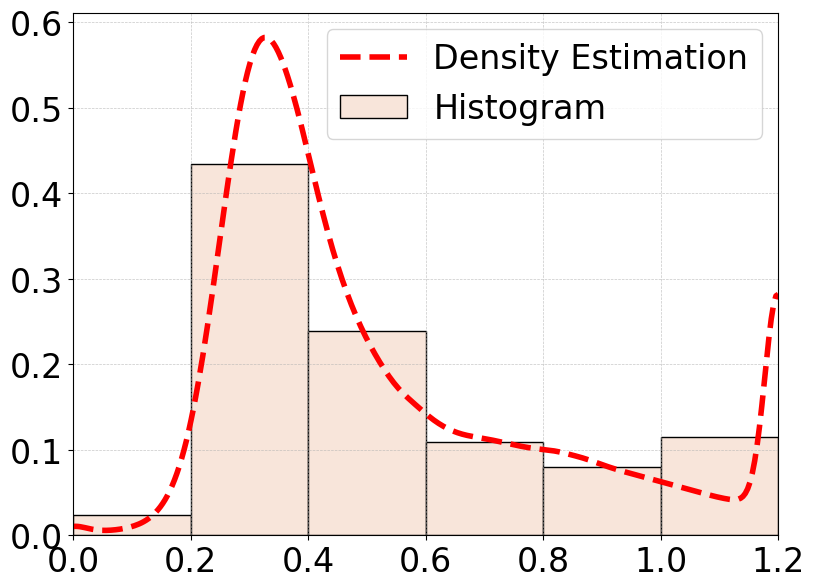

<Figure size 640x480 with 0 Axes>

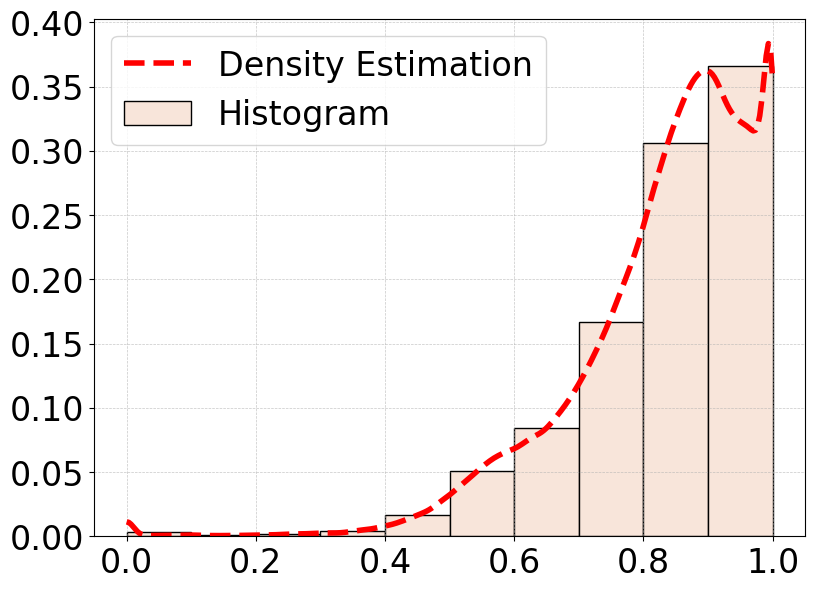

(31,)
(31,)


<Figure size 640x480 with 0 Axes>

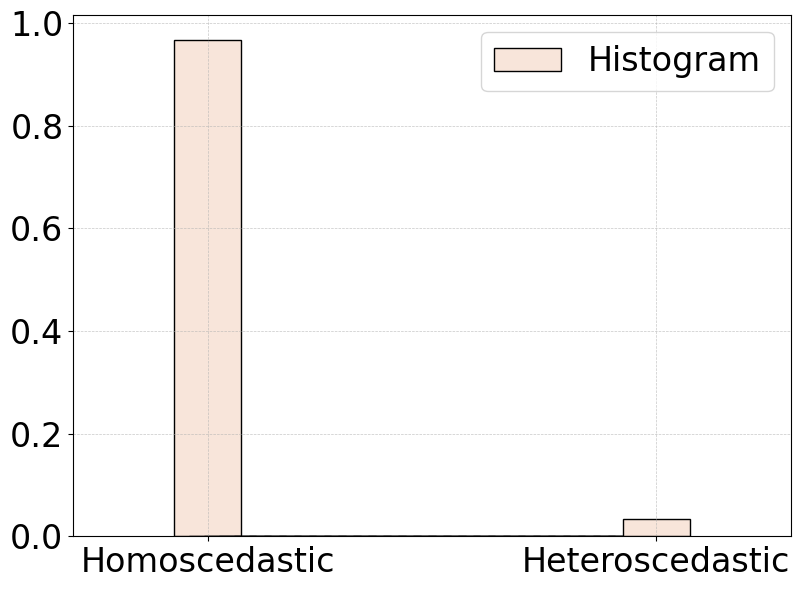

<Figure size 640x480 with 0 Axes>

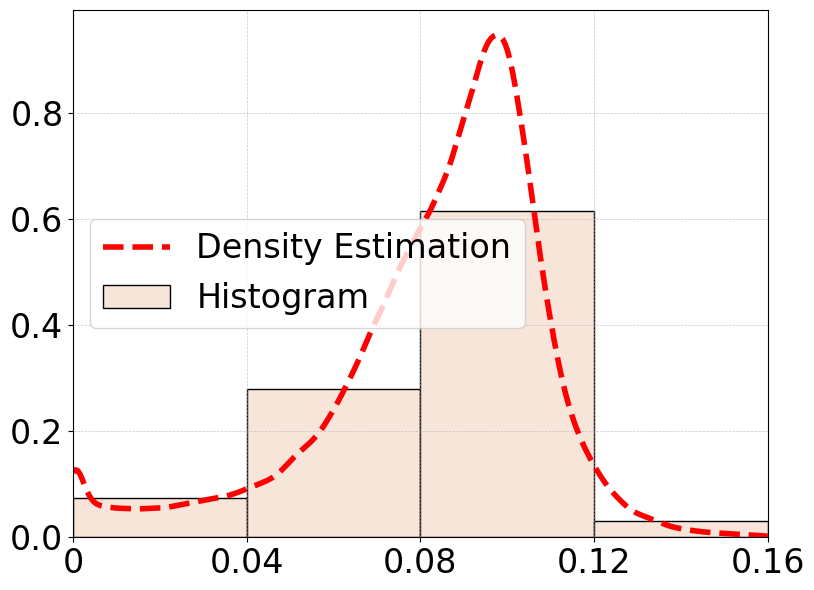

(array([0.07415362, 0.27910197, 0.61563864, 0.03110576]),
 array([0.  , 0.04, 0.08, 0.12, 0.16]))

<Figure size 640x480 with 0 Axes>

In [11]:
# 画出统计直方图
import matplotlib.pyplot as plt
# 设置字体为Times New Roman
import seaborn as sns


color = "#f8e5da"

def split_array_into_equal_intervals(data, n_intervals):
    # Sort the data
    sorted_data = np.sort(data)
    
    # Calculate quantiles
    quantiles = np.linspace(0, 1, n_intervals + 1)
    boundaries = np.quantile(sorted_data, quantiles)
    
    # Define intervals
    intervals = [(boundaries[i], boundaries[i + 1]) for i in range(n_intervals)]
    
    # Allocate indices to each interval
    indices = [
        np.where((data >= intervals[i][0]) & (data < intervals[i][1]))[0]
        for i in range(n_intervals)
    ]
    # Include right endpoint for the last interval
    indices[-1] = np.where((data >= intervals[-1][0]) & (data <= intervals[-1][1]))[0]
    
    bins = []
    for interval in intervals:
        bins.append(interval[0])
    bins.append(interval[1])

    return intervals, bins, indices

from scipy.stats import gaussian_kde
import copy


def plot_histogram_descrete(data, name, width=None, xticks=None, xlabels=None, bins=30, xlim=None, plot_kde=False, crop_data=None, ignore_ooc=False, align='center'):

    data = copy.deepcopy(data)
    if crop_data is not None:
        left = crop_data[0]
        right = crop_data[1]
        if not ignore_ooc:
            data[data < left] = left
            data[data > right] = right
        else:
            data[data < left] = 0
            data[data > right] = 0

    counts, bin_edges = np.histogram(data, bins=bins, density=False)
    probabilities = counts / counts.sum()  # 每个 bin 的概率

    probabilities = np.insert(probabilities, -2, 0)
    print(probabilities.shape)
    print(bin_edges.shape)

    # 绘制直方图，纵轴为概率
    plt.figure(figsize=(8.25, 6))
    plt.bar(bin_edges[:], probabilities[:], width=width, alpha=1, color=color, edgecolor='black', label='Histogram', align=align)
    if plot_kde:
        kde = gaussian_kde(data)
        x_val = np.linspace(data.min(), data.max(), 300)
        density = kde(x_val)
        density = density / density.sum()  # 归一化
        density = density * (300 / bins)
        plt.plot(x_val, density, color='red', linestyle='--', linewidth=4, label='Density Estimation')

    # Style the plot for a top-tier conference paper
    plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xticks(xticks, xlabels, fontsize=24)
    if xlim is not None:
        plt.xlim(xlim)
    plt.yticks(fontsize=24)
    plt.legend(fontsize=24)
    plt.tight_layout()

    # Save the figure as a high-quality image suitable for papers
    plt.savefig(f'distribution/{name}.pdf', format='pdf', transparent=True)
    plt.show()
    plt.clf()
    return probabilities, bin_edges


def plot_histogram(data, name, width=None, xticks=None, xlabels=None, bins=30, xlim=None, plot_kde=False, crop_data=None, ignore_ooc=False, align='edge'):

    data = copy.deepcopy(data)
    if crop_data is not None:
        left = crop_data[0]
        right = crop_data[1]
        if not ignore_ooc:
            data[data < left] = left
            data[data > right] = right
        else:
            data[data < left] = 0
            data[data > right] = 0

    counts, bin_edges = np.histogram(data, bins=bins, density=False)
    probabilities = counts / counts.sum()  # 每个 bin 的概率

    # 绘制直方图，纵轴为概率
    plt.figure(figsize=(8.25, 6))
    if width is None:
         width=np.diff(bin_edges)
    plt.bar(bin_edges[:-1], probabilities, width=width, alpha=1, color=color, edgecolor='black', label='Histogram', align=align)
    if plot_kde:
        kde = gaussian_kde(data)
        x_val = np.linspace(data.min(), data.max(), 300)
        density = kde(x_val)
        density = density / density.sum()  # 归一化
        density = density * (300 / bins)
        plt.plot(x_val, density, color='red', linestyle='--', linewidth=4, label='Density Estimation')

    # Style the plot for a top-tier conference paper
    plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xticks(xticks, xlabels, fontsize=24)
    if xlim is not None:
        plt.xlim(xlim)
    plt.yticks(fontsize=24)
    plt.legend(fontsize=24)
    plt.tight_layout()

    # Save the figure as a high-quality image suitable for papers
    plt.savefig(f'distribution/{name}.pdf', format='pdf', transparent=True)
    plt.show()
    plt.clf()
    return probabilities, bin_edges

# stationarity
plot_histogram_descrete(result_dict_downsampled['Stationarity'], name='Stationarity', xticks=[0, 1], xlabels=['Non-stationary', 'Stationary'], align='center', width=0.15, xlim=[-0.3, 1.3])
# trend
plot_histogram_descrete(result_dict_downsampled['Trend'], name='Trend', bins=10, align='center', width=0.25, xticks=[-1, 0, 1], xlabels=['Decreasing', 'No trend', 'Increasing'], xlim=[-1.4, 1.4])
# trend strength
plot_histogram(result_dict_downsampled['Strength_t'], name='Strength_t', plot_kde=True, xlim=[-1, 1], bins=20, xticks=[-1, -0.5, 0, 0.5, 1], xlabels=[-1, -0.5, 0, 0.5, 1])
# seasonality count
plot_histogram_descrete(result_dict_downsampled['Seasonality_count'], name='Seasonality_count', xticks=[0, 1, 2, 3], xlabels=[0, 1, 2, 3], width=0.35, align='center')
# seasonality strength
plot_histogram(result_dict_downsampled['Seasonality_s'], name='Seasonality_s', plot_kde=True, xlim=[0, 1], bins=10) #  xlim=[0, 1], bins=10)
# volatility
plot_histogram(result_dict_downsampled['Volatility'], name='Volatility', plot_kde=True, xlim=[0, 1.2], bins=6, crop_data=[0, 1.2], ignore_ooc=False)
# memory
plot_histogram(result_dict_downsampled['Memorability'], name='Memorability', plot_kde=True, crop_data=[0, 1], bins=10, align='edge') #, xlim=[0, 1],  crop_data=[0, 1], ignore_ooc=True)
# scedasticity
plot_histogram_descrete(result_dict_downsampled['Scedasticity'], name='Scedasticity', xticks=[0, 1], xlabels=['Homoscedastic', 'Heteroscedastic'], width=0.15, align='center', xlim=[-0.3, 1.3])
# # anomaly
plot_histogram(result_dict_downsampled['Anomaly'], name='Anomaly', xlim=[-0.00, 0.16], bins=4, plot_kde=True, crop_data=[0, 0.16], ignore_ooc=True, xticks=[0, 0.04, 0.08, 0.12, 0.16], xlabels=[0, 0.04, 0.08, 0.12, 0.16])